In [4]:
import pandas as pd
import numpy as np

noteevents_df = pd.read_csv("/Users/saileshpatnala/projects/deep_learning_project/data/mimic-iii-clinical-database-1.4/NOTEEVENTS.csv")
# admissions_df = pd.read_csv("/Users/saileshpatnala/projects/deep_learning_project/data/mimic-iii-clinical-database-1.4/ADMISSIONS.csv")

/Users/saileshpatnala/miniconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
physician_notes_df = noteevents_df[noteevents_df.CATEGORY == 'Physician ']
physician_notes_df

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
308694,316237,16605,109285.0,2138-03-21,2138-03-21 15:02:00,2138-03-21 15:03:05,Physician,Physician Resident Progress Note,21203.0,NaN,Chief Complaint:\n 24 Hour Events:\n Continu...
308695,316238,29075,179159.0,2116-02-07,2116-02-07 15:37:00,2116-02-07 15:37:10,Physician,Physician Resident Progress Note,21203.0,NaN,Chief Complaint:\n 24 Hour Events:\n EGD d...
308698,316241,29075,179159.0,2116-02-07,2116-02-07 15:37:00,2116-02-07 16:05:26,Physician,Physician Resident Progress Note,21203.0,NaN,24 Hour Events:\n EGD demonstrated no eviden...
308699,316242,29075,179159.0,2116-02-07,2116-02-07 15:37:00,2116-02-07 16:08:06,Physician,Physician Resident Progress Note,21203.0,NaN,24 Hour Events:\n EGD demonstrated no eviden...
308700,316243,31608,152365.0,2133-01-16,2133-01-16 16:12:00,2133-01-16 16:12:47,Physician,Physician Resident Progress Note,21203.0,NaN,Chief Complaint:\n 24 Hour Events:\n Recei...
...,...,...,...,...,...,...,...,...,...,...,...
2066675,701664,77163,120851.0,2175-10-10,2175-10-10 06:30:00,2175-10-10 06:56:15,Physician,Physician Resident Progress Note,19796.0,NaN,TITLE:\n Chief Complaint:\n 24 Hour Events...
2066676,701670,59113,169374.0,2194-11-04,2194-11-04 07:06:00,2194-11-04 07:06:25,Physician,Physician Resident Progress Note,20449.0,NaN,Chief Complaint:\n 24 Hour Events:\n -fax ...
2066677,701673,72678,134826.0,2169-09-26,2169-09-26 07:14:00,2169-09-26 07:14:26,Physician,Physician Resident Progress Note,16654.0,NaN,TITLE:\n Chief Complaint:\n 24 Hour Events...
2066678,701674,72678,134826.0,2169-09-26,2169-09-26 07:14:00,2169-09-26 07:15:51,Physician,Physician Resident Progress Note,16654.0,NaN,TITLE:\n Chief Complaint:\n 24 Hour Events...


In [12]:
physician_notes = physician_notes_df[['HADM_ID', 'TEXT']]
physician_notes

,HADM_ID,TEXT
308694,109285.0,Chief Complaint:\n 24 Hour Events:\n Continu...
308695,179159.0,Chief Complaint:\n 24 Hour Events:\n EGD d...
308698,179159.0,24 Hour Events:\n EGD demonstrated no eviden...
308699,179159.0,24 Hour Events:\n EGD demonstrated no eviden...
308700,152365.0,Chief Complaint:\n 24 Hour Events:\n Recei...
...,...,...
2066675,120851.0,TITLE:\n Chief Complaint:\n 24 Hour Events...
2066676,169374.0,Chief Complaint:\n 24 Hour Events:\n -fax ...
2066677,134826.0,TITLE:\n Chief Complaint:\n 24 Hour Events...
2066678,134826.0,TITLE:\n Chief Complaint:\n 24 Hour Events...


In [14]:
def find_admission(s):
    if s.find("Admission Note") > 0 or s.find("Admit Note") > 0:
        return s
    else:
        return ""

physician_notes["admission"] = physician_notes.TEXT.apply(find_admission)

<ipython-input-14-5e92763af201>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  physician_notes["admission"] = physician_notes.TEXT.apply(find_admission)


In [16]:
physician_notes[physician_notes.admission != ""]

,HADM_ID,TEXT,admission
317299,123437.0,TITLE: PGY2 Admit Note\n Chief Complaint: v...,TITLE: PGY2 Admit Note\n Chief Complaint: v...
317300,123437.0,TITLE: PGY2 Admit Note\n Chief Complaint: v...,TITLE: PGY2 Admit Note\n Chief Complaint: v...
317964,148910.0,Chief Complaint: Hypotension\n I saw and ex...,Chief Complaint: Hypotension\n I saw and ex...
317992,148910.0,"Chief Complaint: febrile neutropenia, sepsis\n...","Chief Complaint: febrile neutropenia, sepsis\n..."
317995,146362.0,TITLE: PGY 2 Admission Note\n Chief Complain...,TITLE: PGY 2 Admission Note\n Chief Complain...
...,...,...,...
732034,153581.0,TITLE: Cardiology Fellow Admission Note\n Pl...,TITLE: Cardiology Fellow Admission Note\n Pl...
732688,145965.0,TITLE: Cardiology Fellow Admission Note/ Adden...,TITLE: Cardiology Fellow Admission Note/ Adden...
734951,180498.0,TITLE: Intensivist Admit Note\n I saw and ex...,TITLE: Intensivist Admit Note\n I saw and ex...
736001,180498.0,TITLE: Intensivist Admit Note\n I saw and ex...,TITLE: Intensivist Admit Note\n I saw and ex...


In [18]:
nursing_notes = noteevents_df[noteevents_df.CATEGORY == "Nursing/other"][['HADM_ID', 'TEXT']]
nursing_notes['admission'] = nursing_notes.TEXT.apply(find_admission)
nursing_notes[nursing_notes.admission != ""]

,HADM_ID,TEXT,admission
1240901,160079.0,T/SICU Nursing Admission Note\nThis is a 31 ye...,T/SICU Nursing Admission Note\nThis is a 31 ye...
1241142,159921.0,CCU Nsg. Admit Note\n\nThis is a 61 yr. old wo...,CCU Nsg. Admit Note\n\nThis is a 61 yr. old wo...
1241180,188022.0,Nursing Admission Note:\n 83y.o female admitte...,Nursing Admission Note:\n 83y.o female admitte...
1241313,163612.0,TSICU Nursing Admission Note\n65 yr old male s...,TSICU Nursing Admission Note\n65 yr old male s...
1241772,132614.0,Brief Admission Note to CSRU\n\nPt arrived on ...,Brief Admission Note to CSRU\n\nPt arrived on ...
...,...,...,...
2082674,160082.0,Nursing Admission Note\n\n1 Respiratory\n2 FEN...,Nursing Admission Note\n\n1 Respiratory\n2 FEN...
2082861,165215.0,Nursing Admission Note\nBaby girl [**Known las...,Nursing Admission Note\nBaby girl [**Known las...
2082917,119394.0,NICU Attending Admission Note\n\nID: 31 [**6-2...,NICU Attending Admission Note\n\nID: 31 [**6-2...
2082922,159972.0,Nursing Admission Note 1530\nBaby [**Name (NI)...,Nursing Admission Note 1530\nBaby [**Name (NI)...


In [23]:
import re

admission_notes = nursing_notes[nursing_notes.admission != ""][['HADM_ID', 'admission']]

def remove_markups(text_in):
    text_out = text_in.replace('\n', ' ')
    return text_out

def remove_stars(text_in):
    text_out = re.sub(r'\[\*\*[A-Za-z\s]*[Nn]ame[^\]|\[]*\*\*]', '<NAME>', text_in)
    text_out = re.sub(r'\[\*\*[0-9][^\]|\[]*\*\*]', '<DATE>', text_out)
    text_out = re.sub(r'\[\*\*[^\]|\[]*\*\*]', '<ENTITY>', text_out)
    return text_out

def to_lower(text_in):
    text_out = text_in.lower()
    return text_out

def clean_underscores(text_in):
    text_out = text_in.replace('_', '')
    return text_out


def clean_commas(text_in):
    text_out = text_in.replace(',', '')
    return text_out


def clear_spaces(text_in):
    text_out = re.sub(r' +', ' ', text_in)
    return text_out

def clean_text(text_in):
    text_out = remove_markups(text_in)
    text_out = remove_stars(text_out)
    text_out = to_lower(text_out)
    text_out = clean_underscores(text_out)
    text_out = clean_commas(text_out)
    text_out = clear_spaces(text_out)
    return text_out

def parse_and_clean_admission(text):
    find_phrase = "Admission Note\n"
    start_idx = text.find(find_phrase)
    text = text[start_idx + len(find_phrase):]
    return clean_text(text)

admission_notes['admission_clean'] = admission_notes.admission.apply(parse_and_clean_admission)
admission_notes.drop('admission', axis=1, inplace=True)

In [34]:
admission_notes = admission_notes.rename({'HADM_ID': 'hadm_id', 'admission_clean': 'admission'}, axis=1)
admission_notes

,hadm_id,admission
1240901,160079.0,this is a 31 year old male s/p seizure on ladd...
1241142,159921.0,note this is a 61 yr. old woman with c/o sob ...
1241180,188022.0,ion note: 83y.o female admitted from ew this e...
1241313,163612.0,65 yr old male s/p mvc. pt. does not remember ...
1241772,132614.0,n note to csru pt arrived on stretcher accompa...
...,...,...
2082674,160082.0,1 respiratory 2 fen 3 developmental 4 parents...
2082861,165215.0,baby girl <name> admitted to nicu from l&d for...
2082917,119394.0,id: 31 <date> week gestation girl delivered p...
2082922,159972.0,ion note 1530 baby <name> <name> <name> was bo...


In [56]:
discharge_summary_df = pd.read_csv("/Users/saileshpatnala/projects/deep_learning_project/dataset_creation/mimic-iii_discharge_summary.csv")
discharge_summary_df

,Unnamed: 0,hadm_id,input_text,output_text
0,0,107527.0,sinus rhythm consider left ventricular hypertr...,1. copd/dyspnea/pneumonia: the patient was in...
1,1,167118.0,sinus rhythm bigeminal pacs otherwise probably...,82 y/o female admitted <date> for considerati...
2,2,196489.0,there is mild symmetric left ventricular hype...,87 yo f with h/o chf copd on 5 l oxygen at ba...
3,3,135453.0,regular ventricular pacing with underlying atr...,mr. <name> was seen at <entity> after his fal...
4,4,114236.0,atrial fibrillation with rapid ventricular res...,patient presented electively on <date> for le...
...,...,...,...,...
33293,33293,100783.0,no lung contusion. no pneumothorax. no displa...,this patient was admitted to the plastic surg...
33294,33294,160776.0,the left atrium is mildly dilated. there is m...,he was admitted directly to operating room in...
33295,33295,157973.0,the left atrium is mildly dilated. there is m...,the patient did well the day following his tr...
33296,33296,129192.0,sinus rhythm. baseline artifact. probably with...,underwent <date>: procedure: diagnostic abdom...


In [68]:
df = admission_notes.merge(discharge_summary_df, on="hadm_id").drop(['input_text', 'Unnamed: 0'], axis=1)
df

,hadm_id,admission,output_text
0,160079.0,this is a 31 year old male s/p seizure on ladd...,patient admitted to the trauma service from t...
1,159921.0,note this is a 61 yr. old woman with c/o sob ...,the patient was admitted to the <name> servic...
2,163612.0,65 yr old male s/p mvc. pt. does not remember ...,mr. <name> presented to the emergency departm...
3,132614.0,n note to csru pt arrived on stretcher accompa...,mr. <name> came to the ed within the 3 hour w...
4,176225.0,note: 2135-0700 pt. w/ newly diagnosed non-sma...,# dysphagia: pt with known significant lad co...
...,...,...,...
1861,135854.0,bb <name> is a 39+ weeks gestation infant bw ...,1. respiratory: the infant remained intubated...
1862,135854.0,(continued) other. will keep updated.,1. respiratory: the infant remained intubated...
1863,157077.0,ion note: baby girl <name> brought to nicu fro...,respiratory: shortly after admission to the n...
1864,180552.0,infant is a 29 <date> week twin #1 born last ...,upon admission to the newborn intensive care ...


In [64]:
small_df = df.sample(n=10)
with open('admission_inputs.txt', 'w') as f:
    for row in small_df.admission:
        f.write(row)
        f.write("\n\n\n")
        f.write("==============================================================\n")
        f.write("==============================================================")

In [65]:
with open('discharge_summary.txt', 'w') as f:
    for row in small_df.output_text:
        f.write(row)
        f.write("\n\n\n")
        f.write("==============================================================\n")
        f.write("==============================================================")

In [71]:
import matplotlib.pyplot as plt

input_text_len_list = []
output_text_len_list = []
for _, row in df.iterrows():
    input_text_len_list.append(len(row.admission.split()))
    output_text_len_list.append(len(row.output_text.split()))
    
print('Input Text Length:')
print('---- Max:', np.max(input_text_len_list))
print('---- Average:', np.mean(input_text_len_list))
print('---- Min:', np.min(input_text_len_list))
print('Output Text Length:')
print('---- Max:', np.max(output_text_len_list))
print('---- Average:', np.mean(output_text_len_list))
print('---- Min:', np.min(output_text_len_list))

Input Text Length:
---- Max: 551
---- Average: 284.3043944265809
---- Min: 4
Output Text Length:
---- Max: 2856
---- Average: 560.7073954983923
---- Min: 23


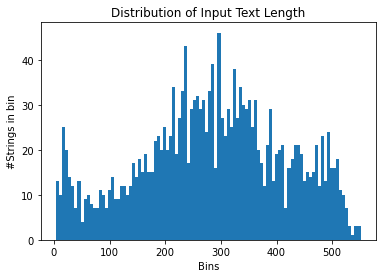

In [72]:
plt.hist(x=input_text_len_list, bins=100)
plt.xlabel('Bins')
plt.ylabel('#Strings in bin')
plt.title('Distribution of Input Text Length')
plt.show()

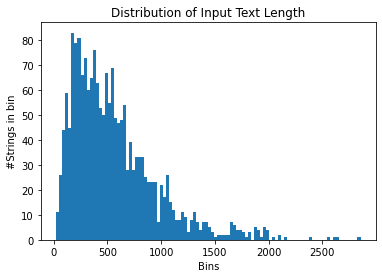

In [73]:
plt.hist(x=output_text_len_list, bins=100)
plt.xlabel('Bins')
plt.ylabel('#Strings in bin')
plt.title('Distribution of Input Text Length')
plt.show()